# Setup and Conficugartion
For setting up 'get_weather' function, the "requests" library is required. Additionally, in order to generate the returns in readable format, installing tabulate package is required to use the tabulat function. Moreover, to encode the location names, the function "quote" is required.

In [1]:
%pip install tabulate
import requests
from tabulate import tabulate
from urllib.parse import quote

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\waqua\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Natural Language Processing: After 'get_weather' the development moves to natural language processing. Setting up for that requires the function to understand natural language, extract the question and provide responses or error messages. 

In [2]:
%pip install spacy
%pip install dateparser
%pip install geopy
%pip install geonamescache

import spacy
import dateparser
from geopy.geocoders import Nominatim
from datetime import datetime, timedelta
from geonamescache import GeonamesCache
import spacy.cli

# Load spaCy model
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Downloading spaCy model 'en_core_web_sm'...")
    spacy.cli.download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

# Global city database for all world cities
import geonamescache
gc = geonamescache.GeonamesCache()
all_cities = {city['name'].lower(): city['name'] for city in gc.get_cities().values()}

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\waqua\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\waqua\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\waqua\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\waqua\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


The following setup is to use geolocator and matplotlib to create visualizations as outputs for weather related questions.

In [3]:
geolocator = Nominatim(user_agent="weather_app")
%pip install matplotlib
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\waqua\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


The following code block installs pyinputplus and imports the installed library by renaming it pyip for better usability. Additionally, typing module and tabulate library allows structured typing, table display, and appropriate user input handling.  

In [4]:
from typing import List, Dict, Any, Optional, Tuple
from tabulate import tabulate
import pyinputplus as pyip

# Weather Data Functions
The purpose of this function is to record  current weather conditions at a specific city, with a short forecast. The coding was prepared in a way that the get_weather(location, forecast_days) function calls the wttr.in service, parses the JSON response and gives the desired return.   

In [5]:
def _safe_int_conversion(value):
    """
    Safely converts a value to an integer, returning None if conversion fails.
    """
    try:
        return int(float(value)) # Convert to float first to handle decimal strings
    except (ValueError, TypeError):
        return None

def _format_current_weather_table(current_weather: dict) -> str:
    """
    Formats current weather data into a human-readable table.
    """
    headers = ["Metric", "Value"]
    table_data = [
        ["Temperature", f"{current_weather.get('temperature_celsius')}°C"],
        ["Feels Like", f"{current_weather.get('feels_like_celsius')}°C"],
        ["Description", current_weather.get('description')],
        ["Humidity", f"{current_weather.get('humidity_percent')}%"] if current_weather.get('humidity_percent') is not None else ["Humidity", "N/A"],
        ["Wind Speed", f"{current_weather.get('wind_speed_kmph')} km/h"] if current_weather.get('wind_speed_kmph') is not None else ["Wind Speed", "N/A"],
    ]
    return tabulate(table_data, headers=headers, tablefmt="grid")

def _format_forecast_table(forecast_data: list) -> str:
    """
    Formats forecast data into a human-readable table.
    """
    headers = ["Date", "Max Temp (°C)", "Min Temp (°C)", "Humidity (%)", "Wind Speed (km/h)", "Chance of Rain (%)", "Description"]
    table_data = []
    for day in forecast_data:
        table_data.append([
            day.get('date'),
            day.get('maxtemp_celsius'),
            day.get('mintemp_celsius'),
            f"{day.get('humidity_percent')}%" if day.get('humidity_percent') is not None else "N/A",
            f"{day.get('wind_speed_kmph')} km/h" if day.get('wind_speed_kmph') is not None else "N/A",
            f"{day.get('chance_of_rain_percent')}%" if day.get('chance_of_rain_percent') is not None else "N/A",
            day.get('description')
        ])
    return tabulate(table_data, headers=headers, tablefmt="grid")

def get_weather(location: str, forecast_days: int) -> dict:
    """
    Fetches current weather conditions and forecast data for a specified location
    using the wttr.in API.

    Args:
        location (str): The name of the city or location (e.g., "London", "New York").
        forecast_days (int): The number of forecast days to retrieve (1-5).

    Returns:
        dict: A dictionary containing current weather and forecast data formatted as tables,
              or an error message if the request fails or the location is invalid.
    """
    # 1. Input Validation
    if not 1 <= forecast_days <= 5:
        return {"error": "Forecast days must be between 1 and 5."}

    # 2. URL Encoding for Location
    # Encode the location to handle spaces and special characters in the URL.
    encoded_location = quote(location)

    # 3. Constructing the API URL
    # The format=j1 parameter requests JSON output.
    # The num_of_days parameter limits the number of forecast days.
    api_url = f"https://wttr.in/{encoded_location}?format=j1&num_of_days={forecast_days}"

    try:
        # 4. Making the API Request
        response = requests.get(api_url)
        response.raise_for_status()  # Raise an exception for HTTP errors (4xx or 5xx).

        # 5. Parsing the JSON Response
        json_data = response.json()

        # 6. Error Handling for Invalid Location from API
        # wttr.in returns an "error" key if the location is not found.
        if "error" in json_data:
            return {"error": f"Location not found or invalid: {location}"}

        # 7. Extracting Current Weather Conditions
        current_condition_data = json_data.get("current_condition", [{}])[0]
        current_weather = {
            "temperature_celsius": _safe_int_conversion(current_condition_data.get("temp_C")),
            "description": current_condition_data.get("weatherDesc", [{}])[0].get("value") if current_condition_data.get("weatherDesc") else "N/A",
            "feels_like_celsius": _safe_int_conversion(current_condition_data.get("FeelsLikeC")),
            "humidity_percent": _safe_int_conversion(current_condition_data.get("humidity")),
            "wind_speed_kmph": _safe_int_conversion(current_condition_data.get("windspeedKmph")),
        }

        # 8. Extracting Forecast Data
        forecast_data_list = []
        for day_data in json_data.get("weather", [])[:forecast_days]:
            daily_forecast = {
                "date": day_data.get("date"),
                "maxtemp_celsius": _safe_int_conversion(day_data.get("maxtempC")),
                "mintemp_celsius": _safe_int_conversion(day_data.get("mintempC")),
                "humidity_percent": _safe_int_conversion(day_data.get("hourly", [{}])[0].get("humidity")) if day_data.get("hourly") else None,
                "wind_speed_kmph": _safe_int_conversion(day_data.get("hourly", [{}])[0].get("windspeedKmph")) if day_data.get("hourly") else None,
                "description": day_data.get("hourly", [{}])[0].get("weatherDesc", [{}])[0].get("value") if day_data.get("hourly") else "N/A",
                "chance_of_rain_percent": _safe_int_conversion(day_data.get("hourly", [{}])[0].get("chanceofrain")) if day_data.get("hourly") else None,
            }
            forecast_data_list.append(daily_forecast)

        # 9. Formatting data as tables
        current_weather_table = _format_current_weather_table(current_weather)
        forecast_table = _format_forecast_table(forecast_data_list)

        # 10. Returning the Processed Data
        return {
            "current_weather_table": current_weather_table,
            "forecast_table": forecast_table, 
            "forecast_data_list": forecast_data_list  # Return raw forecast data for further processing
        }

    except requests.exceptions.RequestException as e:
        # Handle network-related errors (e.g., connection refused, DNS error, HTTP errors).
        return {"error": f"Network error or API request failed: {e}"}
    except ValueError:
        # Handle JSON decoding errors if the response is not valid JSON.
        return {"error": "Failed to decode JSON response from API."}
    except Exception as e:
        # Catch any other unexpected errors for robustness.
        return {"error": f"An unexpected error occurred: {e}"}

# Natural Language Processing
The Weather App is required to parse natural language questions about weather and extract location, time, and weather attribute asked about. It uses spaCy for entity recognition, dateparser to interpret time, and geopy for locations. 
It includes user friendly guidance, confidence scoring, fallback suggestions, context awareness etc and returns location, time, forecast and level of confidence. The code also provides error messages that are conversational instead of hard errors.  

The parser includes features made for easier integration with a user interface:

- User-Friendly Guidance: Gives structured messages and some suggestions when parsing fails or the input is ambiguous.
- Confidence Scoring: Gives scores for the extracted parts like location, time and attributes so the UI can show uncertainty and ask user confirmation.
- Context Awareness: Keeps track of the conversation, letting follow-up questions reuse previously extracted values for smoother interactions.

In [6]:
# Global context storage for conversational awareness
CONTEXT = {
    "location": None,
    "time": None,
    "attributes": [],
    "negated_attributes": []
}
def _parse_time_expression(text: str):
    """
    Parses a time expression from text and returns a string representation.
    Uses dateparser to interpret natural language dates.
    """
    dt = dateparser.parse(text)
    if dt:
        today = datetime.now().date()
        if dt.date() == today:
            return "today"
        elif dt.date() == today + timedelta(days=1):
            return "tomorrow"
        else:
            return dt.strftime("%Y-%m-%d")
    return None
def parse_weather_question_nlp(question: str) -> dict:
    """
    Enhanced NLP-based weather question parser with:
    - User-friendly error messages and suggestions
    - Confidence scoring
    - Fallback interaction with location suggestions
    - Conversational context awareness

    Returns:
        dict with keys:
        - location, time, attributes, negated_attributes
        - confidence (scores for each element)
        - suggestions (e.g., alternate city matches)
        - messages (user-friendly guidance/errors)
        - context (carried over values from previous queries)
    """
    ATTRIBUTE_KEYWORDS = {
        "rain": "chance_of_rain", "precipitation": "chance_of_rain",
        "temperature": "temperature", "temp": "temperature", "hot": "temperature", "cold": "temperature",
        "sun": "sun", "sunny": "sun",
        "wind": "wind", "windy": "wind",
        "humidity": "humidity", "humid": "humidity",
        "clouds": "clouds", "cloudy": "clouds",
        "conditions": "description", "weather": "description", "forecast": "description"
    }

    doc = nlp(question)
    lower_question = question.lower()

    extracted_info = {
        "location": None,
        "time": None,
        "attributes": [],
        "negated_attributes": [],
        "confidence": {},
        "suggestions": {},
        "messages": [],
        "context": CONTEXT.copy()
    }

    # ---- 1. Extract Location ----
    location_found = False
    location_confidence = 0.0
    suggestions = []

    for ent in doc.ents:
        if ent.label_ == "GPE":
            try:
                location = geolocator.geocode(ent.text, exactly_one=False, limit=3)
                if location:
                    extracted_info["location"] = ent.text
                    location_found = True
                    location_confidence = ent.kb_id_ if ent.kb_id_ else 0.9  # heuristic confidence
                    if len(location) > 1:
                        suggestions = [loc.address for loc in location]
                    break
            except Exception:
                continue

    if not location_found:
    # Check all cities in the dictionary for substring match (supports multi-word and special characters)
        for city_key, city_value in all_cities.items():
            if city_key.lower() in lower_question:
                extracted_info["location"] = city_value
                location_found = True
                location_confidence = 0.75
                break

    # If still not found, try geopy on the whole question
    if not location_found:
        try:
            location = geolocator.geocode(question, exactly_one=True)
            if location:
                extracted_info["location"] = location.address
                location_found = True
                location_confidence = 0.7
        except Exception:
            pass


    # If still not found, fallback to context
    if not location_found and CONTEXT["location"]:
        extracted_info["location"] = CONTEXT["location"]
        extracted_info["messages"].append("No location specified, using last known location from context.")
        location_confidence = 0.6

    if not location_found and not CONTEXT["location"]:
        extracted_info["messages"].append(
            "Could not confidently extract a location. Please specify a city name (e.g., 'London' or 'New York')."
        )
        if suggestions:
            extracted_info["suggestions"]["location"] = suggestions

    extracted_info["confidence"]["location"] = location_confidence

    # ---- 2. Extract Time ----
    time_expression_text = None
    time_confidence = 0.0

    time_phrases = sorted([
        "the day after tomorrow", "next 3 days", "next 5 days", "next weekend",
        "this week", "next week", "in a week", "in two days", "next month",
        "tomorrow", "today"
    ], key=len, reverse=True)

    for phrase in time_phrases:
        if phrase in lower_question:
            time_expression_text = phrase
            break

    if time_expression_text:
        parsed_time = _parse_time_expression(time_expression_text)
        if parsed_time:
            extracted_info["time"] = parsed_time
        else:
            extracted_info["time"] = time_expression_text
        time_confidence = 0.9
    else:
        parsed_full_q_time = _parse_time_expression(question)
        if parsed_full_q_time:
            extracted_info["time"] = parsed_full_q_time
            time_confidence = 0.7
        elif CONTEXT["time"]:
            extracted_info["time"] = CONTEXT["time"]
            extracted_info["messages"].append("No explicit time found, using last known time from context.")
            time_confidence = 0.6
        else:
            extracted_info["time"] = "today"
            extracted_info["messages"].append("No time specified, defaulting to 'today'.")
            time_confidence = 0.5

    extracted_info["confidence"]["time"] = time_confidence

    # ---- 3. Extract Attributes ----
    found_attributes = set()
    found_negated_attributes = set()
    attr_confidence = 0.0

    for token in doc:
        if token.text.lower() in ATTRIBUTE_KEYWORDS:
            attr = ATTRIBUTE_KEYWORDS[token.text.lower()]
            is_negated = False
            if token.i > 0 and doc[token.i - 1].text.lower() in ["not", "no", "n\'t", "n’t"]:
                is_negated = True
            if token.i > 1 and doc[token.i - 2].text.lower() == "without":
                is_negated = True
            if is_negated:
                found_negated_attributes.add(attr)
            else:
                found_attributes.add(attr)

    if found_attributes or found_negated_attributes:
        attr_confidence = 0.9
    elif CONTEXT["attributes"]:
        found_attributes = set(CONTEXT["attributes"])
        attr_confidence = 0.6
        extracted_info["messages"].append("No attributes specified, using last known attributes from context.")
    else:
        found_attributes.add("description")
        attr_confidence = 0.5
        extracted_info["messages"].append("No specific attributes found, defaulting to general weather description.")

    extracted_info["attributes"] = list(found_attributes)
    extracted_info["negated_attributes"] = list(found_negated_attributes)
    extracted_info["confidence"]["attributes"] = attr_confidence

    # ---- 4. Update Global Context ----
    CONTEXT.update({
        "location": extracted_info["location"],
        "time": extracted_info["time"],
        "attributes": extracted_info["attributes"],
        "negated_attributes": extracted_info["negated_attributes"]
    })
    extracted_info["context"] = CONTEXT.copy()

    return extracted_info

# Visualization Functions

The following section of the notebook extends the weather parsing and API integration by allowing user interaction with a prompt that allows asking a weather related question specifying a city name. The function then collects weather data using the 'get_weather' function and fetching current and forecast weather data. Along with displaying the weather data in a tabulated format, it creates a trend visualization using 'matplotlib'. 

The workflow is as follows: 

i. User enters a weather related question. 

ii. Natural Language Processing parser extracts 
    information. 

iii. Weather data is retrieved from the 'wttr.in' API. 

iv. Current and forecast data are shown in tables. 

v. Trend visualizations are generated for the specified attribute. 

The following functionality is to generate the line chart for weather data. 

In [7]:
def create_weather_visualisation(weather_data: dict, city: str, attribute: str):
    """
    Generates a weather trend chart dynamically for the chosen attribute.
    Supports attributes: temperature, humidity, wind, chance_of_rain.
    """
    if "forecast_table" not in weather_data:
        return

    forecast_data_list = weather_data.get("forecast_data_list", [])
    if not forecast_data_list:
        return

    days = ["Today"] + [f"Day {i}" for i in range(2, len(forecast_data_list)+1)]

    if attribute == "temperature":
        max_vals = [day["maxtemp_celsius"] for day in forecast_data_list]
        min_vals = [day["mintemp_celsius"] for day in forecast_data_list]

        plt.figure(figsize=(5,3))
        plt.plot(days, max_vals, marker='o', label="Max Temp (°C)")
        plt.plot(days, min_vals, marker='o', label="Min Temp (°C)")
        plt.title(f"Temperature Trend for {city}")
        plt.xlabel("Days")
        plt.ylabel("Temperature (°C)")
        plt.legend()
        plt.grid(True)
        plt.show()

    elif attribute == "humidity":
        humidity_vals = [day.get("humidity_percent", 50) for day in forecast_data_list]

        plt.figure(figsize=(5,3))
        plt.plot(days, humidity_vals, marker='o', color="blue", label="Humidity (%)")
        plt.title(f"Humidity Trend for {city}")
        plt.xlabel("Days")
        plt.ylabel("Humidity (%)")
        plt.legend()
        plt.grid(True)
        plt.show()

    elif attribute == "wind":
        wind_vals = [day.get("wind_speed_kmph", 10) for day in forecast_data_list]

        plt.figure(figsize=(5,3))
        plt.plot(days, wind_vals, marker='o', color="green", label="Wind Speed (km/h)")
        plt.title(f"Wind Speed Trend for {city}")
        plt.xlabel("Days")
        plt.ylabel("Wind Speed (km/h)")
        plt.legend()
        plt.grid(True)
        plt.show()

    elif attribute == "chance_of_rain":
        rain_vals = [day.get("chance_of_rain_percent", 0) for day in forecast_data_list]

        plt.figure(figsize=(5,3))
        plt.plot(days, rain_vals, color="skyblue", label="Chance of Rain (%)")
        plt.title(f"Chance of Rain Trend for {city}")
        plt.xlabel("Days")
        plt.ylabel("Chance of Rain (%)")
        plt.ylim(0, 100)
        plt.legend()
        plt.grid(axis="y", linestyle='--', alpha=0.7)
        plt.show()


# Core functionality without user interaction
def process_weather(city: str, attribute: str = "temperature", forecast_days: int = 3):
    weather_result = get_weather(city, forecast_days)
    if "error" not in weather_result:
        create_weather_visualisation(weather_result, city, attribute)
    return weather_result

The following section is to generate the bar chart for precipitation chances percentage. 

In [8]:
def create_rain_visualisation(weather_data: dict, city: str):
    """
    Generates a bar chart for chance of rain over forecast days.
    """
    forecast_list = weather_data.get("forecast_data_list", [])
    if not forecast_list:
        return

    days = ["Today"] + [f"Day {i}" for i in range(2, len(forecast_list)+1)]
    rain_vals = [day.get("chance_of_rain_percent", 0) for day in forecast_list]

    plt.figure(figsize=(6,4))
    plt.bar(days, rain_vals, color="skyblue")
    plt.title(f"Chance of Rain in {city}")
    plt.xlabel("Days")
    plt.ylabel("Chance of Rain (%)")
    plt.ylim(0, 100)
    plt.grid(axis="y", linestyle='--', alpha=0.7)
    plt.show()


# Core processing function without user interaction
def process_rain(city: str, forecast_days: int = 3):
    weather = get_weather(city, forecast_days)
    if "error" not in weather:
        create_rain_visualisation(weather, city)
    return weather

# Main Application Logic


The following block of code has 2 core functionalities, run_weather_process and run_rain_process. The run_weather_process function calls get_weather to fetch weather data at a city for specified number of days. It also checks for error in case get_weather fails to generate the desired results, directs creation of visualization, and returns weather result. The run_rain_process is a specialized version of the run_weather_process to only visualize chance of precipitation. 

In [9]:
def run_weather_process(city: str, forecast_days: int = 3, attribute: str = "temperature"):
    """
    Core functionality of the weather app without interactive prompts.
    Fetches weather data and optionally generates a visualization.
    """
    weather_result = get_weather(city, forecast_days)
    
    if "error" not in weather_result:
        # Optional visualization
        if attribute in ["temperature", "humidity", "wind", "chance_of_rain"]:
            create_weather_visualisation(weather_result, city, attribute)
    
    return weather_result


def run_rain_process(city: str, forecast_days: int = 3):
    """
    Core functionality for chance of rain visualization.
    """
    weather_result = get_weather(city, forecast_days)
    
    if "error" not in weather_result:
        create_rain_visualisation(weather_result, city)
    
    return weather_result

The following block of code acts as the central application logic. The previous iterative code blocks have the fetching weather, parsing, visualization, and interative prompting functionalities. While these so far work individually, this Main Application Logic brings them together and makes the app robust. 

Summary functionalities are: 
- Starting the console menu. 
- Allowing users to choose location, number of days for forecast, and select attributes.
- Showing tables and charts.
- Looping until user exits.
- Changing selections without exiting.
- Quick access option get data on last used city.  

In [10]:
def main_app():
    """
    Enhanced Weather App main logic with Quick Access:
    - Continuous menu
    - Maintains context: last city, forecast days, and attribute
    - Allows switching cities, attributes, or forecast days
    - Quick access to last-used city and settings
    """
    print("\n🌤 Welcome to the Enhanced Weather App 🌤\n")

    # Initialize context variables
    city = None
    forecast_days = 3
    attribute = "temperature"
    weather_result = None

    while True:
        # Main menu
        action = pyip.inputMenu(
            [
                "Ask about weather",
                "Quick Access (last city & settings)",
                "Change city",
                "Change forecast days",
                "Change attribute",
                "View Temperature Chart",
                "View Precipitation Chart",
                "Exit"
            ],
            prompt="\nMain Menu - Choose an action:\n",
            numbered=True
        )

        if action == "Exit":
            print("👋 Goodbye! Thanks for using the Weather App.")
            break

        # Step 1: Ask a weather question
        if action == "Ask about weather":
            if not city:
                city = pyip.inputStr("Enter a city/location:\n")

            question = pyip.inputStr("Enter your weather question (optional, press Enter to skip NLP):\n")
            if question.strip():
                parsed_info = parse_weather_question_nlp(question)
                if "error" in parsed_info:
                    print(f"❌ Error parsing question: {parsed_info['error']}")
                    continue

                city = parsed_info.get("location") or city
                attributes = parsed_info.get("attributes", [])
                attribute = attributes[0] if attributes else attribute

                # Determine forecast_days
                time_expr = parsed_info.get("time", "today")
                if time_expr == "today" or time_expr == "tomorrow":
                    forecast_days = 1
                elif isinstance(time_expr, str) and "next" in time_expr and "days" in time_expr:
                    try:
                        forecast_days = int(time_expr.split()[1])
                    except:
                        forecast_days = forecast_days
                elif isinstance(time_expr, str) and "in" in time_expr and "days" in time_expr:
                    try:
                        forecast_days = int(time_expr.split()[1])
                    except:
                        forecast_days = forecast_days

            # Fetch weather
            weather_result = get_weather(city, forecast_days)
            if "error" in weather_result:
                print(f"❌ Error fetching weather: {weather_result['error']}")
                weather_result = None
                continue

            # Display tables
            print(f"\n📍 Current Weather in {city}:")
            print(weather_result["current_weather_table"])
            print(f"\n📅 Forecast in {city}:")
            print(weather_result["forecast_table"])

        # Step 2: Quick Access
        elif action == "Quick Access (last city & settings)":
            if not city or not weather_result:
                print("❌ No previous city/settings found. Please ask a weather question first.")
                continue

            print(f"⚡ Quick Access: Fetching weather for {city} ({forecast_days} days, attribute: {attribute})")
            weather_result = get_weather(city, forecast_days)
            if "error" in weather_result:
                print(f"❌ Error fetching weather: {weather_result['error']}")
                continue

            # Display tables
            print(f"\n📍 Current Weather in {city}:")
            print(weather_result["current_weather_table"])
            print(f"\n📅 Forecast in {city}:")
            print(weather_result["forecast_table"])

        # Step 3: Change city
        elif action == "Change city":
            city = pyip.inputStr("Enter new city/location:\n")
            weather_result = None  # Reset until next fetch
            print(f"✅ City changed to {city}.")

        # Step 4: Change forecast days
        elif action == "Change forecast days":
            forecast_days = int(pyip.inputMenu(
                ["1", "2", "3", "4", "5"],
                prompt="Select forecast days (1-5):\n",
                numbered=True
            ))
            weather_result = None
            print(f"✅ Forecast days set to {forecast_days}.")

        # Step 5: Change attribute
        elif action == "Change attribute":
            attribute = pyip.inputMenu(
                ["temperature", "humidity", "wind", "chance_of_rain", "description"],
                prompt="Select attribute:\n",
                numbered=True
            )
            print(f"✅ Attribute set to {attribute}.")

        # Step 6: View Temperature Chart
        elif action == "View Temperature Chart":
            if not weather_result:
                print("❌ Please fetch weather first using 'Ask about weather' or Quick Access.")
                continue
            create_weather_visualisation(weather_result, city, "temperature")

        # Step 7: View Precipitation Chart
        elif action == "View Precipitation Chart":
            if not weather_result:
                print("❌ Please fetch weather first using 'Ask about weather' or Quick Access.")
                continue
            create_weather_visualisation(weather_result, city, "chance_of_rain")

# User Interface
The Weather App is equipped with an interactive user console with an interface to show current weather conditions, forecasts and charts. Users are prompted to enter a location, select forecast days, and select a weather related attribute they want information on. 

The flow of functionalities in this interface are as follows: 
- User enters a city name or location
- User selects number of forecast days (1-3 days)
- User selects a weather related attribute such as temperature, humidity, wind, chance of rain etc. 
- System provides current and forecast weather data in tabular format. 
- System generates temperature and precipitation charts. 
- The console includes options to select days beyond 3 days and weather attributes beyond the ones in get_weather for future scalability. 

In [13]:
# ====== CONFIGURABLE OPTIONS ======
FORECAST_DAY_OPTIONS = [1, 2, 3, 5, 7]  # scalable, extendable
WEATHER_ATTRIBUTES = ["temperature", "humidity", "wind", "chance_of_rain", "description", "uv_index", "visibility"]
CHART_TYPES = {
    "line": "Line Chart (weather trend)",
    "bar": "Bar Chart (precipitation)"
}

# ====== TABLE FORMATTER ======
def format_forecast_table(forecast_data: List[Dict[str, Any]]) -> str:
    """
    Convert forecast data into a formatted table.

    Args:
        forecast_data: A list of dictionaries with forecast details.

    Returns:
        str: A tabulated string of forecast data.
    """
    if not forecast_data:
        return "⚠️ No forecast data available."

    headers = [
        "Date",
        "Max Temp (°C)",
        "Min Temp (°C)",
        "Humidity (%)",
        "Wind Speed (km/h)",
        "Chance of Rain (%)",
        "Description",
        "UV Index",
        "Visibility (km)"
    ]
    forecast_table_data = []
    for day in forecast_data:
        try:
            forecast_table_data.append([
                day.get('date', "N/A"),
                day.get('maxtemp_celsius', "N/A"),
                day.get('mintemp_celsius', "N/A"),
                f"{day.get('humidity_percent')}%" if day.get('humidity_percent') is not None else "N/A",
                f"{day.get('wind_speed_kmph')} km/h" if day.get('wind_speed_kmph') is not None else "N/A",
                f"{day.get('chance_of_rain_percent')}%" if day.get('chance_of_rain_percent') is not None else "N/A",
                day.get('description', "N/A"),
                day.get('uv_index', "N/A"),
                f"{day.get('visibility_km')} km" if day.get('visibility_km') is not None else "N/A",
            ])
        except Exception as e:
            forecast_table_data.append(["Error parsing data"] + ["N/A"] * (len(headers) - 1))

    return tabulate(forecast_table_data, headers=headers, tablefmt="grid")

# ====== INPUT HANDLERS ======
def get_city_input(all_cities: Dict[str, str]) -> str:
    """
    Ask user to enter a city, validate, and confirm.

    Args:
        all_cities: Dictionary of valid cities {normalized_name: display_name}.

    Returns:
        str: Validated city name.
    """
    while True:
        city = pyip.inputStr("Enter the city or location name:\n").strip()
        city_key = city.lower()
        matched_city = all_cities.get(city_key)

        if matched_city:
            confirm = pyip.inputYesNo(f"Is '{matched_city}' the correct city? (yes/no):\n")
            if confirm == "yes":
                return matched_city
        else:
            # Suggest closest matches (simple heuristic: startswith match)
            suggestions = [c for c in all_cities.values() if c.lower().startswith(city_key[:3])]
            if suggestions:
                print(f"❓ Did you mean: {', '.join(suggestions[:3])}?")
            print("⚠️ City not recognized. Please try again.")

def get_forecast_days() -> int:
    """Prompt user for forecast days."""
    choice = pyip.inputMenu([str(d) for d in FORECAST_DAY_OPTIONS],
                            prompt="Select number of forecast days:\n",
                            numbered=True)
    return int(choice)

def get_attribute_choice() -> str:
    """Prompt user for attribute selection."""
    return pyip.inputMenu(WEATHER_ATTRIBUTES,
                          prompt="Select the weather attribute you want:\n",
                          numbered=True)

def get_chart_choice() -> str:
    """Prompt user for chart type selection."""
    return pyip.inputMenu(list(CHART_TYPES.values()),
                          prompt="Select chart type to display:\n",
                          numbered=True)

# ====== WEATHER WORKFLOW ======
def fetch_weather_data(city: str, forecast_days: int) -> Dict[str, Any]:
    """
    Fetch weather data safely.

    Args:
        city: City name.
        forecast_days: Number of forecast days.

    Returns:
        Dict[str, Any]: Weather results with current and forecast data.
    """
    try:
        result = get_weather(city, forecast_days)  # external integration
        if not isinstance(result, dict) or "error" in result:
            return {"error": result.get("error", "Unexpected response format.")}
        return result
    except Exception as e:
        return {"error": str(e)}

def display_weather_results(city: str, forecast_days: int, weather_result: Dict[str, Any]) -> Dict[str, Any]:
    """
    Display current and forecast weather, return structured data.

    Args:
        city: City name.
        forecast_days: Number of forecast days.
        weather_result: API response dictionary.

    Returns:
        Dict[str, Any]: Structured output for testability.
    """
    if "error" in weather_result:
        print(f"❌ Error fetching weather: {weather_result['error']}")
        return {"error": weather_result["error"]}

    output = {
        "current_weather": weather_result.get("current_weather_table", "N/A"),
        "forecast": weather_result.get("forecast_table", "N/A")
    }

    print(f"\n📍 The current Weather in {city} is:")
    print(output["current_weather"])
    print(f"\n📅 The forecast in {city} for the next {forecast_days} days is:")
    print(output["forecast"])

    return output

def handle_chart(weather_result: Dict[str, Any], city: str, attribute: str, chart_type: str) -> None:
    """
    Handle chart creation.

    Args:
        weather_result: API response.
        city: City name.
        attribute: Weather attribute.
        chart_type: Selected chart type.
    """
    try:
        if chart_type.startswith("Line"):
            if attribute in ["temperature", "humidity", "wind", "chance_of_rain"]:
                create_weather_visualisation(weather_result, city, attribute)
            else:
                print("⚠️ No line chart available for selected attribute.")
        else:
            create_rain_visualisation(weather_result, city)
    except Exception as e:
        print(f"⚠️ Failed to generate chart: {str(e)}")

# ====== MAIN WORKFLOW ======
def stepwise_weather_prompt(all_cities: Dict[str, str]) -> Dict[str, Any]:
    """
    Stepwise interactive weather query workflow.

    Args:
        all_cities: Dictionary of available cities.

    Returns:
        Dict[str, Any]: Weather results and metadata.
    """
    print("\n🌦 Stepwise Weather Query 🌦\n")

    # Step 1: City selection
    city = get_city_input(all_cities)

    # Step 2: Forecast days
    forecast_days = get_forecast_days()

    # Step 3: Attribute selection
    attribute = get_attribute_choice()

    # Step 4: Chart type
    chart_type = get_chart_choice()

    # Step 5: Fetch and display
    weather_result = fetch_weather_data(city, forecast_days)
    structured_output = display_weather_results(city, forecast_days, weather_result)

    # Step 6: Chart
    if "error" not in structured_output:
        handle_chart(weather_result, city, attribute, chart_type)

    return {
        "city": city,
        "forecast_days": forecast_days,
        "attribute": attribute,
        "chart_type": chart_type,
        "results": structured_output
    }


## Testing and Examples
The following section runs the codes and tests the outputs to check the functionality of the Weather App. 


🌦 Stepwise Weather Query 🌦

Enter the city or location name:
Is 'Delhi' the correct city? (yes/no):
Select number of forecast days:
1. 1
2. 2
3. 3
4. 5
5. 7
Select the weather attribute you want:
1. temperature
2. humidity
3. wind
4. chance_of_rain
5. description
6. uv_index
7. visibility
Select chart type to display:
1. Line Chart (weather trend)
2. Bar Chart (precipitation)

📍 The current Weather in Delhi is:
+-------------+---------+
| Metric      | Value   |
+=============+=========+
| Temperature | 29°C    |
+-------------+---------+
| Feels Like  | 30°C    |
+-------------+---------+
| Description | Haze    |
+-------------+---------+
| Humidity    | 75%     |
+-------------+---------+
| Wind Speed  | 6 km/h  |
+-------------+---------+

📅 The forecast in Delhi for the next 3 days is:
+------------+-----------------+-----------------+----------------+---------------------+----------------------+---------------+
| Date       |   Max Temp (°C) |   Min Temp (°C) | Humidity (%)   | 

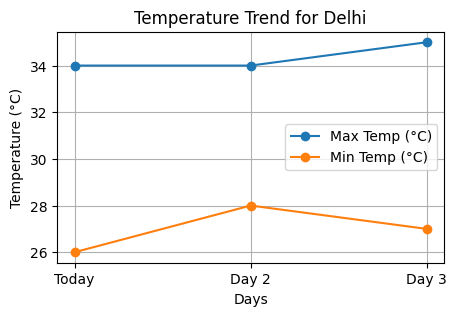

{'city': 'Delhi',
 'forecast_days': 3,
 'attribute': 'temperature',
 'chart_type': 'Line Chart (weather trend)',
 'results': {'current_weather': '+-------------+---------+\n| Metric      | Value   |\n+=============+=========+\n| Temperature | 29°C    |\n+-------------+---------+\n| Feels Like  | 30°C    |\n+-------------+---------+\n| Description | Haze    |\n+-------------+---------+\n| Humidity    | 75%     |\n+-------------+---------+\n| Wind Speed  | 6 km/h  |\n+-------------+---------+',
  'forecast': '+------------+-----------------+-----------------+----------------+---------------------+----------------------+---------------+\n| Date       |   Max Temp (°C) |   Min Temp (°C) | Humidity (%)   | Wind Speed (km/h)   | Chance of Rain (%)   | Description   |\n+============+=================+=================+================+=====================+======================+===============+\n| 2025-10-01 |              34 |              26 | 65%            | 5 km/h              | 0%     

In [12]:
# Run the stepwise prompt
stepwise_weather_prompt(all_cities)